# <center> Акустические признаки </center>

In [1]:
import librosa
import numpy as np
import scipy 
import scipy.fft
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import librosa.filters
import hashlib
from glob import glob
import os
import sklearn

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Функция отрисовки аудио сигнала

In [2]:
def draw_waveform(wav, sr, figsize=(14, 5)):
    # Отрисовка звукового сигнала во временной области
    plt.figure(figsize=figsize)
    librosa.display.waveshow(wav, sr=sr)
    plt.show()

# Загрузим файл

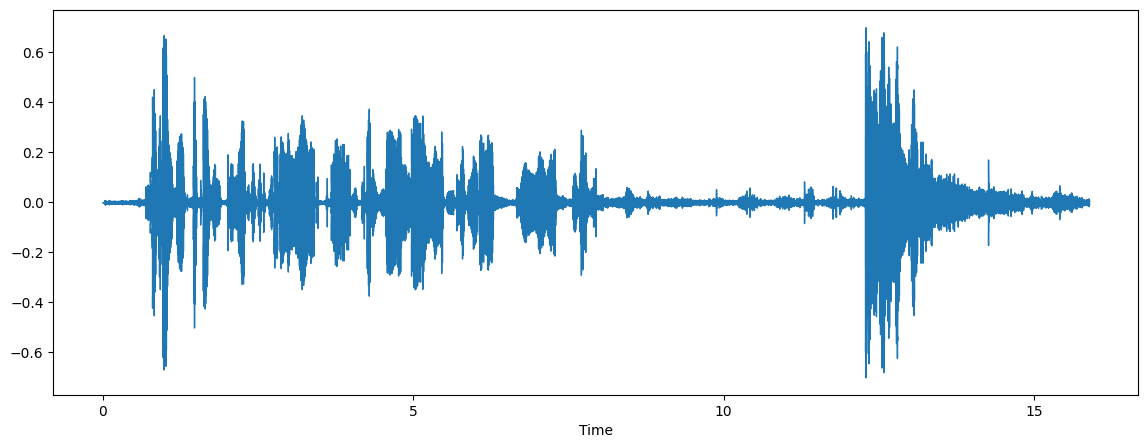

In [3]:
wav, sr = librosa.load("gun.wav", sr=None)
draw_waveform(wav, sr)
ipd.Audio(wav, rate=sr)

Построим спектрограмму загруженной вавки

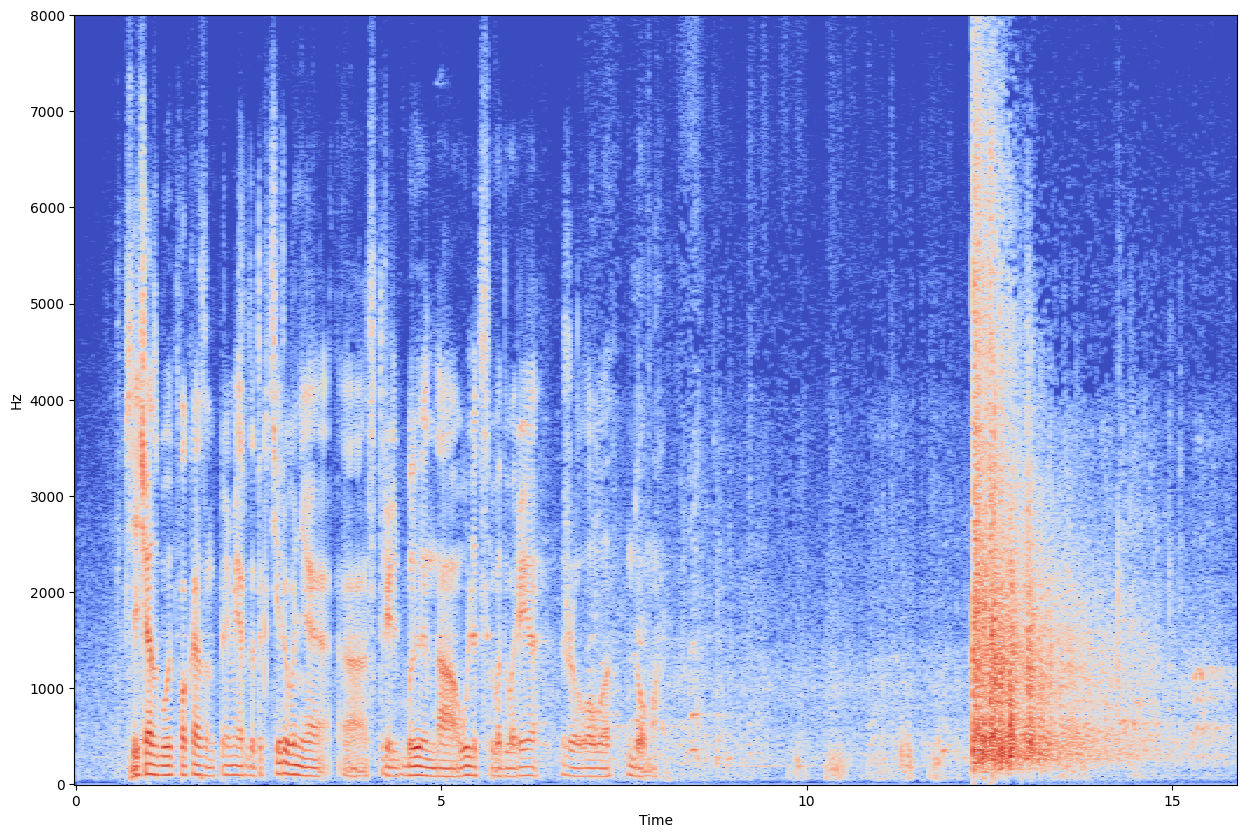

In [4]:
stft = librosa.stft(wav)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(15,10))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')

Можно заметить, что звук выстрела находится примерно в 12 секундах

In [53]:
window_ms = 12
n_fft = window_ms * sr//1000
step = sr // 1000

# Выстрел
Применим фильтр нижних частот для избавления от лишних шумов

In [54]:
filter = scipy.signal.butter(10, 1000, btype='lowpass', fs=sr, output='sos')
filtered_signal = scipy.signal.sosfilt(filter, wav)

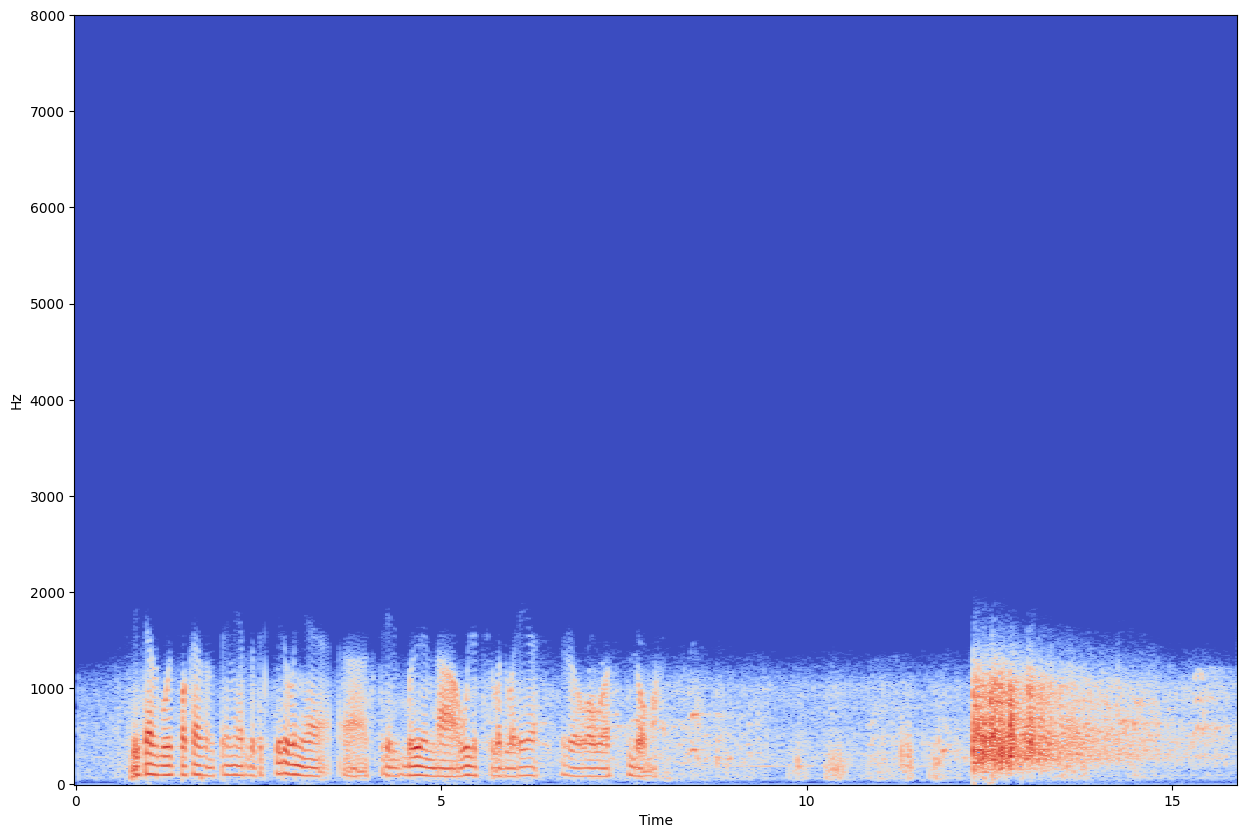

In [55]:
stft = librosa.stft(filtered_signal)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(15,10))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')

Gun Activity Detector (GAD) определяет, есть ли звук выстрела.

In [56]:
def classifier(wav, threshold, win, step):
    
    steps = len(wav) // step + 1
    detected = np.zeros(steps)
    
    for i in range(steps):
        k = i * step
        energy = np.sum(np.abs(scipy.fft.fft(wav[k: k + win]) ** 2))
        if energy > threshold:
            detected[i] = 1
    
    ids = np.argwhere(detected == 1)
    first, last = ids[0].item(), ids[-1].item()
    
    detected[first:last] = 1
    res = np.repeat(detected, step)
    
    
    return res[:len(wav)]

In [57]:
result = classifier(filtered_signal, 1000, win=n_fft, step=step)
result_filtered = classifier(filtered_signal, 1000, win=n_fft, step=step)

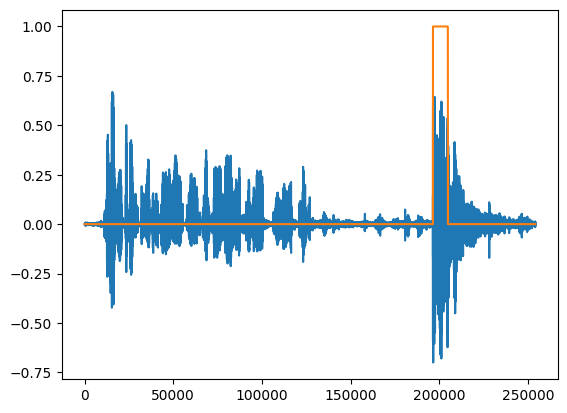

In [58]:
plt.plot(wav)
plt.plot(result)
plt.show()

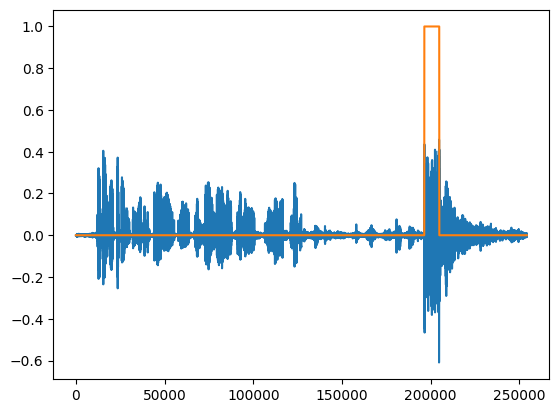

In [59]:
plt.plot(filtered_signal)
plt.plot(result_filtered)
plt.show()

### Результаты

При подобранном параметре окна было выполнено детектирование звука выстрела правильно. По времени можно заметить, что он был определен после 12 секунды. Был применен фильтр низких частот, но особого влияния на выявление он не повлиял.